In [3]:
import pandas as pd
import torch 
from torch import nn
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cpu


In [4]:
dataset=pd.read_csv("/kaggle/input/car-price-prediction/CarPrice_Assignment.csv")
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [5]:
#printing duplicated values
duplicated_rows = dataset[dataset.duplicated()]
print(f"duplicated values are : {duplicated_rows.shape[0]}")
print(dataset.isnull().sum())


duplicated values are : 0
car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64


In [6]:
# using OneHotEncoding to convert non-numeric columns into numeric ones\
from sklearn.preprocessing import OneHotEncoder

object_columns = dataset.select_dtypes(include=['object']).columns

encoder = OneHotEncoder(sparse=False)

one_hot_encoded = encoder.fit_transform(dataset[object_columns])

one_hot_df = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(object_columns))

dataset = pd.concat([dataset, one_hot_df], axis=1).drop(columns=object_columns)

print(dataset.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Columns: 201 entries, car_ID to fuelsystem_spfi
dtypes: float64(193), int64(8)
memory usage: 322.0 KB
None


/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [7]:
y=dataset['price']
x=dataset.drop(['price'],axis=1)


In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [9]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f'Mean Squared Error (MSE) for Random Forest: {mse_rf}')
print(f'R-squared (R2) for Random Forest: {r2_rf}')


Mean Squared Error (MSE) for Random Forest: 3563061.5913066827
R-squared (R2) for Random Forest: 0.9548659727284703


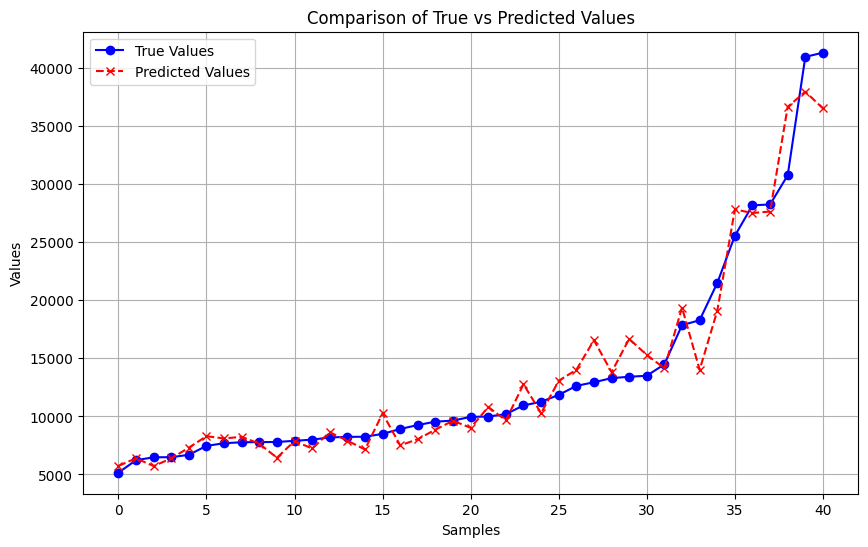

In [11]:
import matplotlib.pyplot as plt
import numpy as np

sorted_indices = np.argsort(y_test)
y_test_sorted = np.array(y_test)[sorted_indices]
y_pred_sorted = y_pred_rf[sorted_indices]

plt.figure(figsize=(10, 6))
plt.plot(y_test_sorted, label='True Values', marker='o', linestyle='-', color='blue')
plt.plot(y_pred_sorted, label='Predicted Values', marker='x', linestyle='--', color='red')

plt.title('Comparison of True vs Predicted Values')
plt.xlabel('Samples')
plt.ylabel('Values')
plt.legend()
plt.grid(True)

plt.show()
